1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model"

In [2]:
import numpy as np 
import pandas as pd
import matplotlib as plt

In [3]:
data=pd.read_csv("HR.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.groupby("Department").count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
Department,,,,,,,,,
IT,1227,1227,1227,1227,1227,1227,1227,1227,1227
RandD,787,787,787,787,787,787,787,787,787
accounting,767,767,767,767,767,767,767,767,767
hr,739,739,739,739,739,739,739,739,739
management,630,630,630,630,630,630,630,630,630
marketing,858,858,858,858,858,858,858,858,858
product_mng,902,902,902,902,902,902,902,902,902
sales,4140,4140,4140,4140,4140,4140,4140,4140,4140
support,2229,2229,2229,2229,2229,2229,2229,2229,2229


In [7]:
dummies=pd.get_dummies(data.Department)
dummies

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [8]:
merged=pd.concat([data,dummies],axis='columns')
merged

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,0,0,0,0,0,0,0,1,0


In [9]:
final=merged.copy()
final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0


In [10]:
final.drop(axis=1,columns=["Department","IT"],inplace=True)


In [11]:
final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


In [12]:
final.groupby("salary").count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,,,,,,,,
high,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237,1237
low,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316,7316
medium,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446,6446


In [13]:
#print(data['salary'].unique())
final['salary'] = final['salary'].map({"low":0, "medium":1, "high":2})
print(final['salary'].unique())

[0 1 2]


In [14]:
final.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [15]:
final.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'RandD', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical'],
      dtype='object')

In [16]:
new_data=final.drop(["left"],axis=1)

In [17]:
new_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,1,0


In [18]:
x=new_data.values
y=final[["left"]].values

In [19]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=0)
test_y


array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model=LogisticRegression(random_state=0)

In [24]:
model.fit(train_x,train_y)

C:\Users\Girish\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Girish\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [25]:
model.score(test_x,test_y)

0.7893333333333333

In [68]:
final.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
left,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.650945,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.414730,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183



From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

<AxesSubplot:xlabel='salary'>

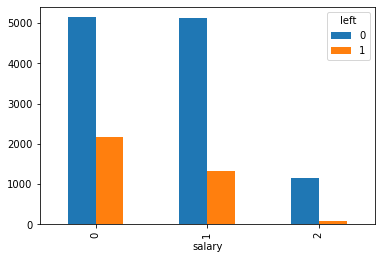

In [73]:
pd.crosstab(final.salary,data.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

<AxesSubplot:xlabel='Department'>

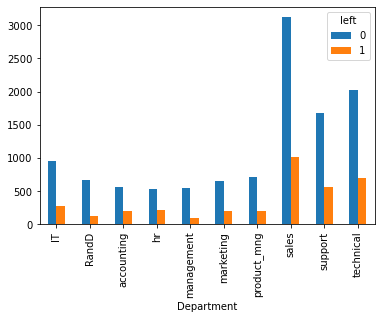

In [74]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis


From the data analysis so far we can conclude that we will use following variables as independant variables in our model
**Satisfaction Level**

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**

In [77]:
final.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [81]:
x1=final.iloc[:,[0,3,7,8]].values
y1=final.iloc[:,6]


In [82]:
from sklearn.model_selection import train_test_split
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,test_size=0.2,random_state=0)
test_y1

1670     1
13378    0
10233    0
4719     0
7003     0
        ..
14035    0
8469     0
12453    1
9431     0
4202     0
Name: left, Length: 3000, dtype: int64

In [83]:
model1=LogisticRegression(random_state=0)

In [84]:
model.fit(train_x1,train_y1)

LogisticRegression(random_state=0)

In [85]:
model.score(test_x1,test_y1)

0.783